### SVM Kernels

In [34]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
x=np.linspace(-5.0,5.0,100)
y=np.sqrt(10**2 - x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])

In [35]:
# Create df1
df1 = pd.DataFrame(np.vstack([y, x]).T, columns=['X1', 'X2'])
df1['Y'] = 0


In [36]:
x1=np.linspace(-5.0,5.0,100)
y1=np.sqrt(5**2 - x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

In [37]:
import pandas as pd
df2 = pd.DataFrame(np.vstack([y1, x1]).T, columns=['X1', 'X2'])
df2['Y'] = 1


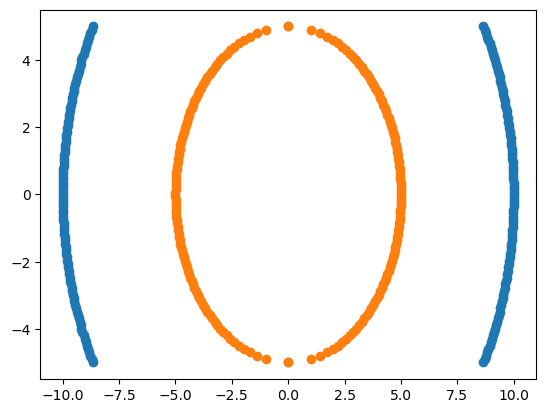

In [38]:
plt.scatter(y,x) 
plt.scatter(y1,x1) 

In [39]:
df=df1.append(df2)

In [40]:
df.head()

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


### Polynomial Kernel



#### We need to calculate for Polynomial Kernel

In [41]:
df['X1_squared']=df['X1']**2
df['X2_squared']=df['X2']**2
df['X1*X2']=df['X1']*df['X2']

In [42]:
df.head()

,X1,X2,Y,X1_squared,X2_squared,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [43]:
X=df[['X1_squared','X2_squared','X1*X2']]
y=df[['Y']]

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

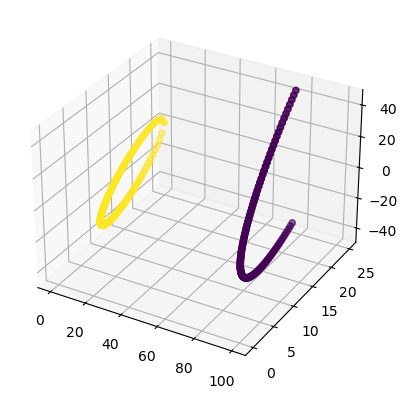

In [46]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['X1_squared'], df['X2_squared'], df['X1*X2'], c=df['Y'])

plt.show()


In [47]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
classfier=SVC(kernel='linear')
classfier.fit(X_train,y_train)
y_predict=classfier.predict(X_test)
print(accuracy_score(y_test,y_predict))

1.0


### RBF

In [48]:
X=df[['X1','X2']]
y=df['Y']

In [49]:
X.head()

,X1,X2
0,8.660254,-5.00000
1,8.717792,-4.89899
2,8.773790,-4.79798
3,8.828277,-4.69697
4,8.881281,-4.59596


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [51]:
classfier=SVC(kernel="rbf")
classfier.fit(X_train,y_train)
y_pred=classfier.predict(X_test)
print(accuracy_score(y_pred,y_test))

1.0


### Sigmoid Kernel

In [52]:
classfier=SVC(kernel="sigmoid")
classfier.fit(X_train,y_train)
y_pred=classfier.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.55
